In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import PowerTransformer

In [30]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
plt.subplot(2,3,1)
plt.hist()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

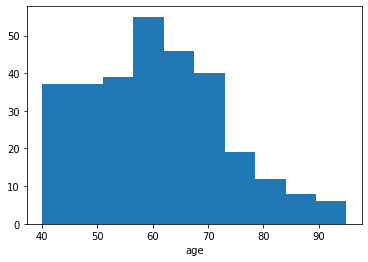

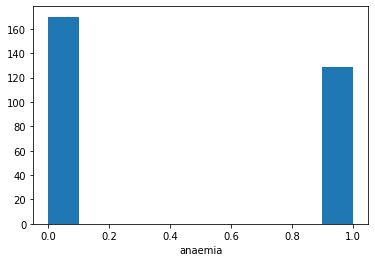

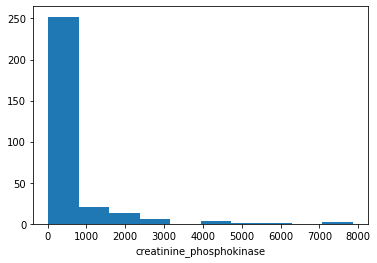

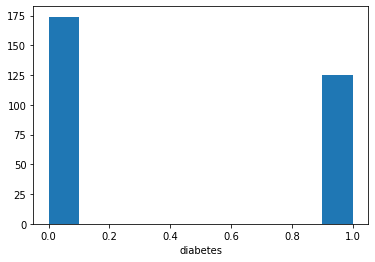

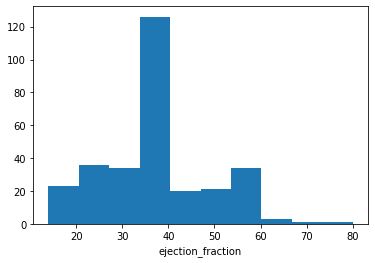

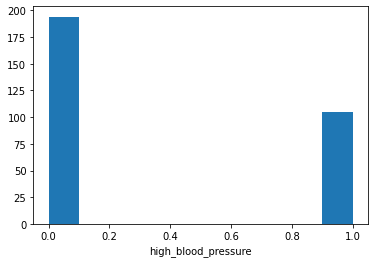

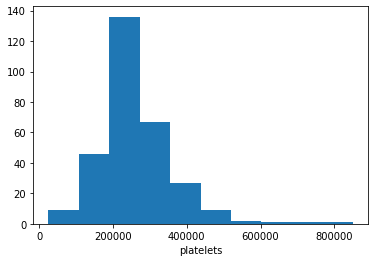

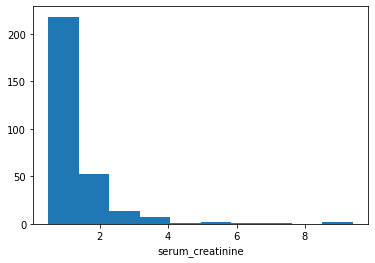

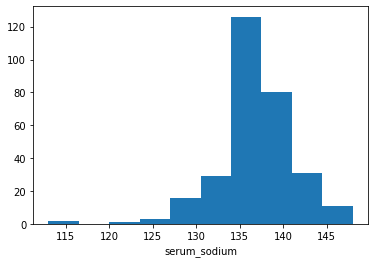

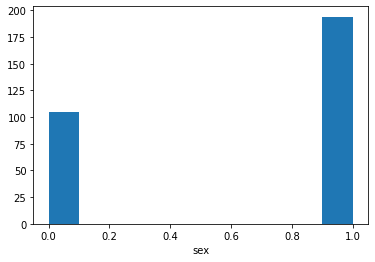

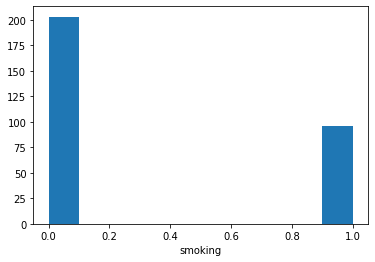

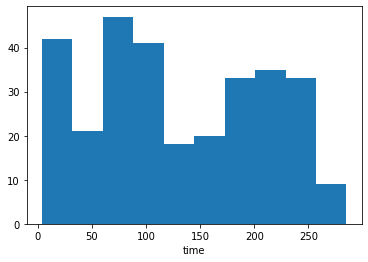

In [6]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
            'ejection_fraction', 'high_blood_pressure', 'platelets',
            'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

for i in features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


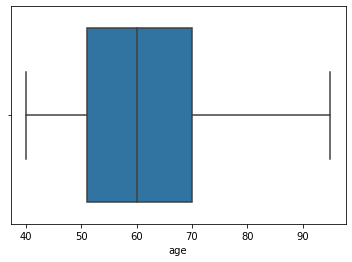

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


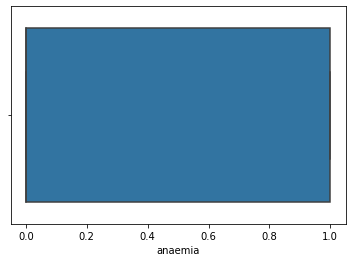

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


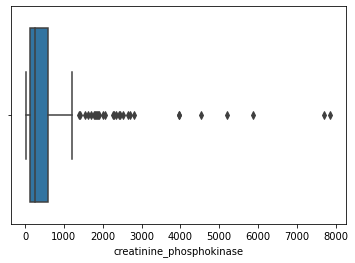

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


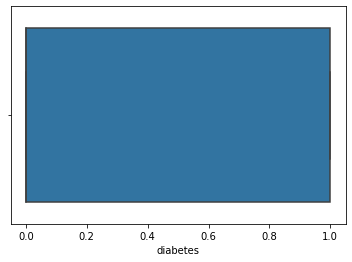

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


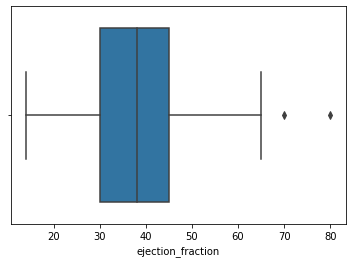

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


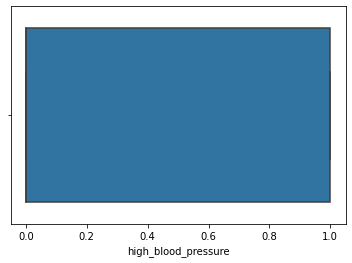

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


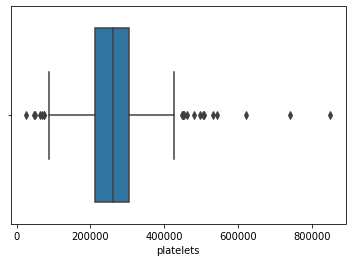

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


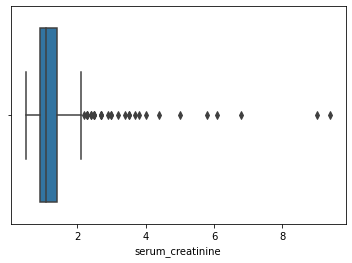

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


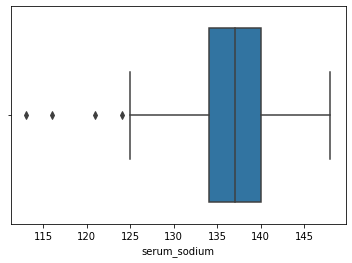

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


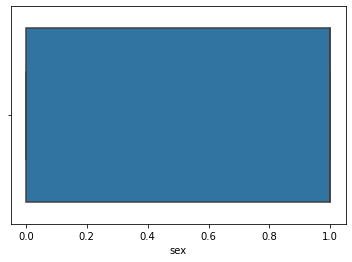

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


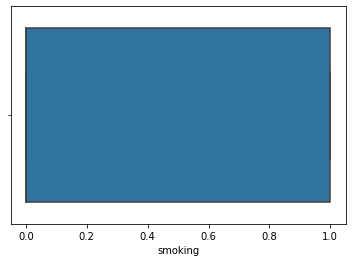

C:\Users\Aryan\.conda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


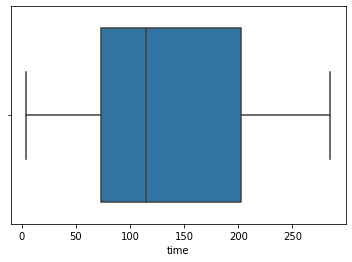

In [7]:
for i in features:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
# plt.boxplot()

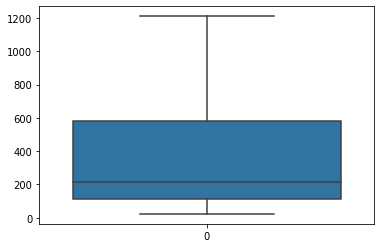

In [8]:
df = df[df.creatinine_phosphokinase<1300]
sns.boxplot(data=df.creatinine_phosphokinase)
plt.show()

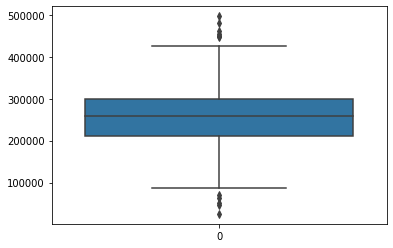

In [9]:
df = df[df.platelets<500000]
sns.boxplot(data=df.platelets)
plt.show()

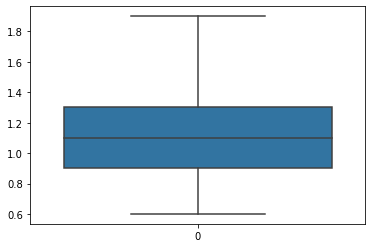

In [10]:
df = df[df.serum_creatinine<2.0]
sns.boxplot(data=df.serum_creatinine)
plt.show()

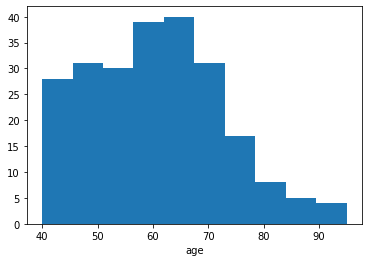

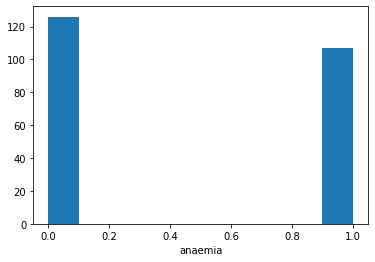

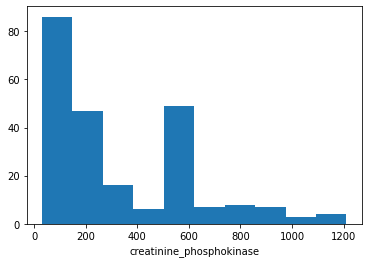

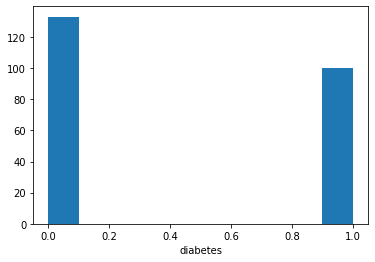

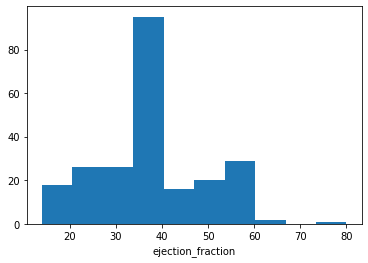

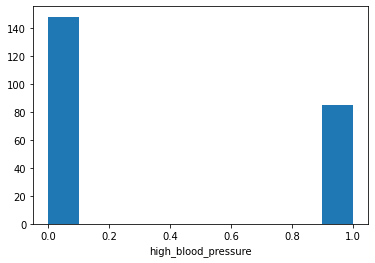

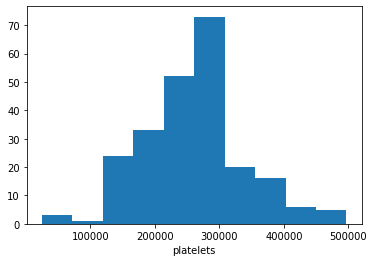

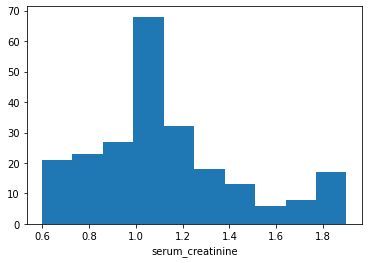

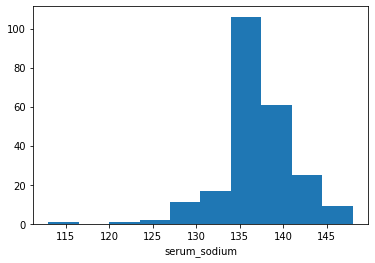

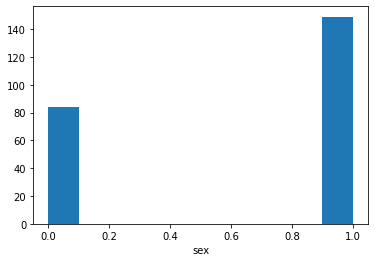

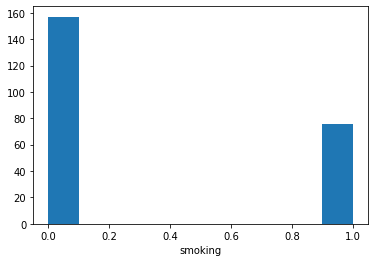

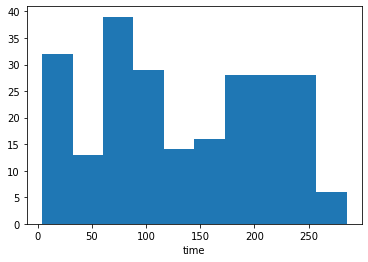

In [11]:
for i in features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

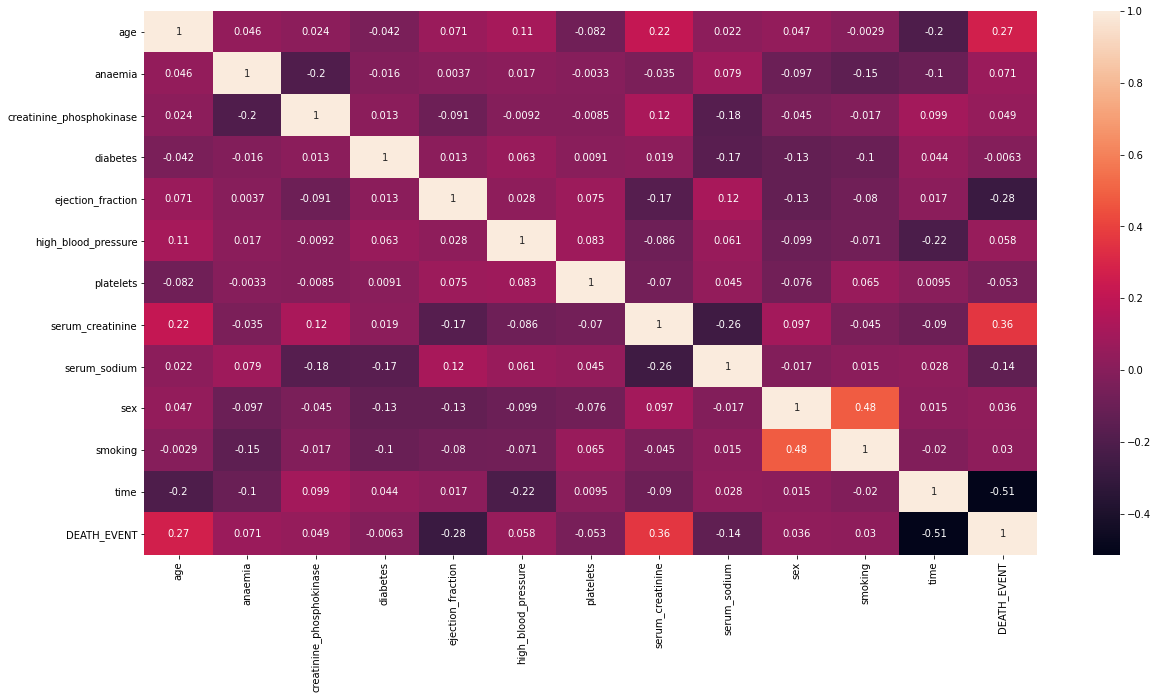

In [12]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [13]:
# df.drop('sex', 1)

In [14]:
df.drop('time', 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,0


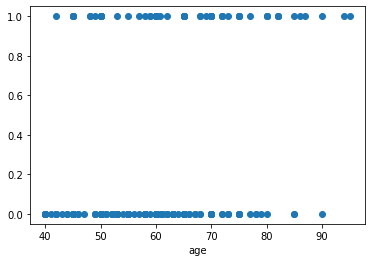

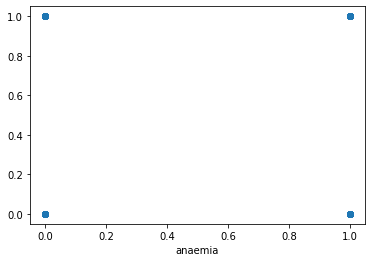

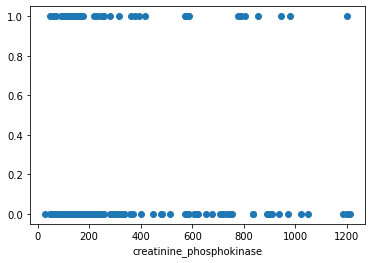

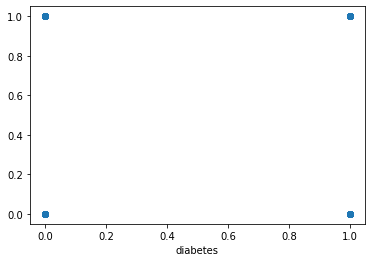

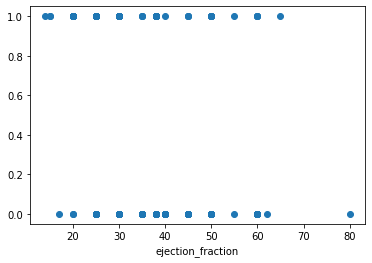

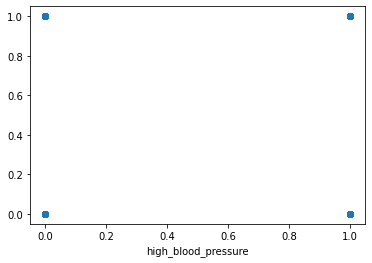

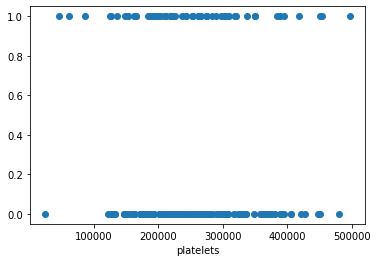

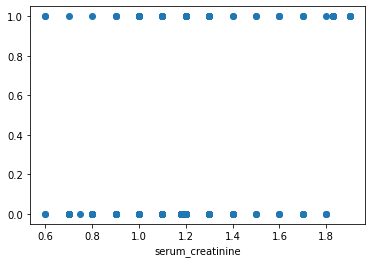

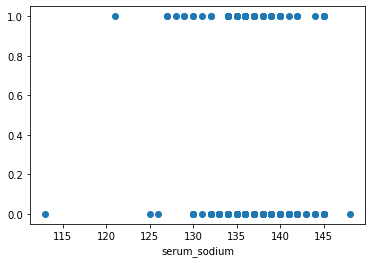

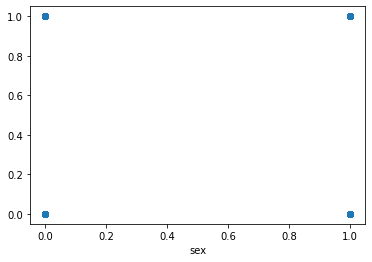

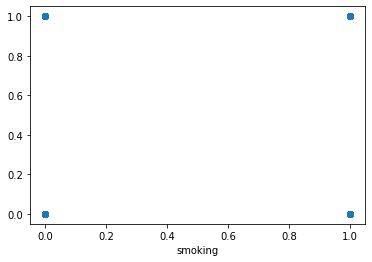

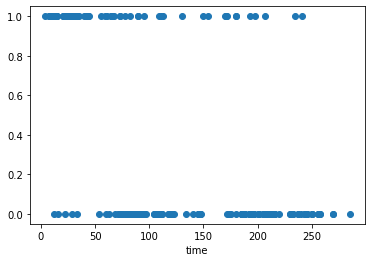

In [15]:
for i in features:
    plt.scatter(x=df[i], y=df.DEATH_EVENT)
    plt.xlabel(i)
    plt.show()

In [16]:
X = df[features]
y = df.DEATH_EVENT

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred = rfc_y_pred.reshape(-1,1)
rfc_y_pred.shape

(47, 1)

In [21]:
rfc.score(X_test, y_test)

0.8723404255319149

In [22]:
gbc = GradientBoostingClassifier(max_depth=110, random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=110,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
gbc.score(X_test, y_test)

0.8297872340425532

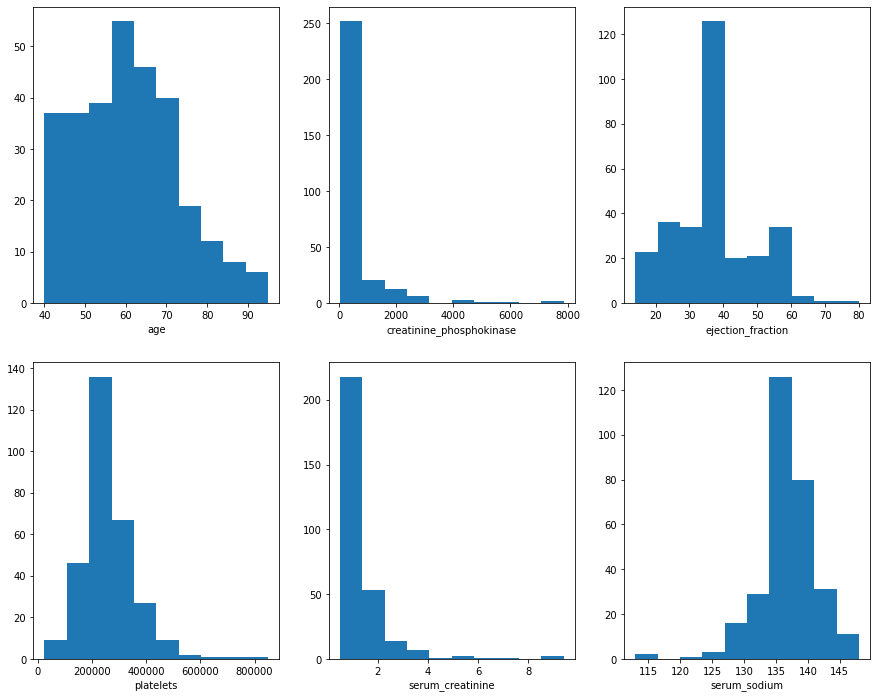

In [35]:
required_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(15,12))
for i in range(len(required_features)):
    plt.subplot(2,3,i+1)
    plt.hist(df[required_features[i]])
    plt.xlabel(required_features[i])

In [47]:
scaling_features = ['creatinine_phosphokinase', 'serum_creatinine']
# for i in range(len(scaling_features)):
#     df_1 = pt.fit_transform(df[scaling_features[i]])

pt = PowerTransformer(method='box-cox')
df_transformed = pt.fit_transform(feature_1)

In [50]:
pt = PowerTransformer(method='box-cox')
df_transformed_2 = pt.fit_transform(feature_2)

In [46]:
feature_1 = df.creatinine_phosphokinase
feature_1 = pd.DataFrame(feature_1)
feature_1.shape

(299, 1)

In [49]:
feature_2 = df.serum_creatinine
feature_2 = pd.DataFrame(feature_2)
feature_2.shape

(299, 1)

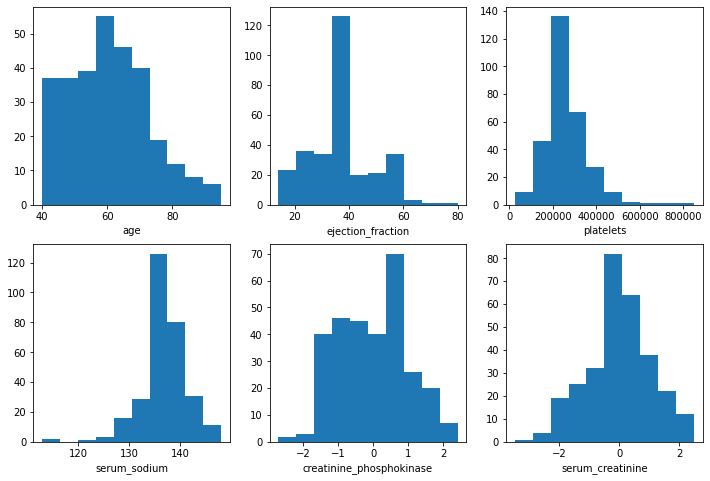

In [71]:
final_features = ['age', 'ejection_fraction', 'platelets', 'serum_sodium']
plt.figure(figsize=(12,8))

for i in range(len(final_features)):
    plt.subplot(2,3,i+1)
    plt.hist(df[final_features[i]])
    plt.xlabel(final_features[i])
    
plt.subplot(2,3,5)
plt.hist(df_transformed)
plt.xlabel('creatinine_phosphokinase')
# plt.show()

plt.subplot(2,3,6)
plt.hist(df_transformed_2)
plt.xlabel('serum_creatinine')
plt.show()

In [76]:
df_transformed = pd.DataFrame(df_transformed)
df_transformed

,0
0,0.690684
1,2.406132
2,-0.552166
3,-0.832460
4,-0.461198
...,...
294,-1.488662
295,1.529406
296,1.611747
297,1.714566


In [77]:
df_transformed_2 = pd.DataFrame(df_transformed_2)
df_transformed_2

,0
0,1.153092
1,-0.059056
2,0.383097
3,1.153092
4,1.649245
...,...
294,-0.059056
295,0.180351
296,-1.134100
297,0.557014


In [78]:
df_final = pd.concat([df, df_transformed, df_transformed_2], 1)
df_final

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,0,0
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.690684,1.153092
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2.406132,-0.059056
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,-0.552166,0.383097
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,-0.832460,1.153092
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,-0.461198,1.649245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,-1.488662,-0.059056
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,1.529406,0.180351
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1.611747,-1.134100
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,1.714566,0.557014


In [79]:
df_final.drop(['creatinine_phosphokinase', 'serum_creatinine'], 1, inplace=True)
df_final

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT,0,0
0,75.0,0,0,20,1,265000.00,130,1,0,4,1,0.690684,1.153092
1,55.0,0,0,38,0,263358.03,136,1,0,6,1,2.406132,-0.059056
2,65.0,0,0,20,0,162000.00,129,1,1,7,1,-0.552166,0.383097
3,50.0,1,0,20,0,210000.00,137,1,0,7,1,-0.832460,1.153092
4,65.0,1,1,20,0,327000.00,116,0,0,8,1,-0.461198,1.649245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155000.00,143,1,1,270,0,-1.488662,-0.059056
295,55.0,0,0,38,0,270000.00,139,0,0,271,0,1.529406,0.180351
296,45.0,0,1,60,0,742000.00,138,0,0,278,0,1.611747,-1.134100
297,45.0,0,0,38,0,140000.00,140,1,1,280,0,1.714566,0.557014


In [81]:
df_final.drop('DEATH_EVENT', 1, inplace=True)
df_final

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,0,0
0,75.0,0,0,20,1,265000.00,130,1,0,4,0.690684,1.153092
1,55.0,0,0,38,0,263358.03,136,1,0,6,2.406132,-0.059056
2,65.0,0,0,20,0,162000.00,129,1,1,7,-0.552166,0.383097
3,50.0,1,0,20,0,210000.00,137,1,0,7,-0.832460,1.153092
4,65.0,1,1,20,0,327000.00,116,0,0,8,-0.461198,1.649245
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155000.00,143,1,1,270,-1.488662,-0.059056
295,55.0,0,0,38,0,270000.00,139,0,0,271,1.529406,0.180351
296,45.0,0,1,60,0,742000.00,138,0,0,278,1.611747,-1.134100
297,45.0,0,0,38,0,140000.00,140,1,1,280,1.714566,0.557014


In [87]:
df

Index([                'age',             'anaemia',            'diabetes',
         'ejection_fraction', 'high_blood_pressure',           'platelets',
              'serum_sodium',                 'sex',             'smoking',
                      'time',                     0,                     0],
      dtype='object')

In [82]:
X2 = df_final[:]
y2 = df.DEATH_EVENT

In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [84]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
rfc2.score(X_test2, y_test2)

0.85

In [ ]:
rfc.score()